# Pandas EDA with IMDb data

### BASIC LEVEL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in 'imdb_1000.csv' and store it in a DataFrame named movies
imdb_1000_data_url = '../data/imdb_1000.csv'
movies = pd.read_csv(imdb_1000_data_url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [3]:
# check the number of rows and columns
movies.shape

(979, 6)

In [4]:
# check the data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [5]:
# calculate the average movie duration
movies['duration'].mean()

120.97957099080695

In [6]:
# sort the DataFrame by duration to find the shortest and longest movies
print(movies.sort_values('duration')[['title', 'duration']].head(1))
print(movies.sort_values('duration')[['title', 'duration']].tail(1))

      title  duration
389  Freaks        64
      title  duration
476  Hamlet       242


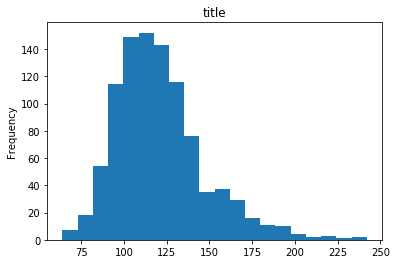

In [7]:
# create a histogram of duration, choosing an "appropriate" number of bins
movies['duration'].plot('hist', bins=20, title="title")

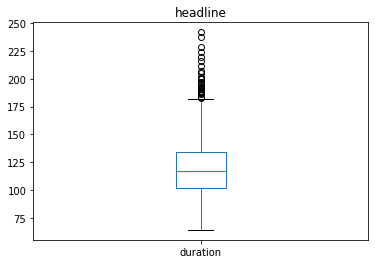

In [8]:
# use a box plot to display that same data
movies['duration'].plot('box', title='headline')

### INTERMEDIATE LEVEL

In [9]:
# count how many movies have each of the content ratings
vcounts = movies['content_rating'].value_counts()
vcounts

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

Text(0, 0.5, 'Number of Movies')

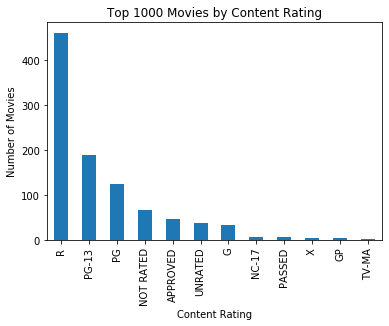

In [10]:
# use a visualization to display that same data, including a title and x and y labels
vcounts.plot(kind='bar', title='Top 1000 Movies by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')

In [11]:
# convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
print(movies.content_rating.value_counts())
movies.loc[(movies['content_rating']=='NOT RATED') |
           (movies['content_rating']=='APPROVED') |
           (movies['content_rating']=='PASSED') |
           (movies['content_rating']=='GP'),
           'content_rating']="UNRATED"

print(movies.content_rating.value_counts())

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64
R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64


In [12]:
# convert the following content ratings to "NC-17": X, TV-MA; 
print(movies.content_rating.value_counts())
movies.loc[(movies['content_rating']=='X') |
           (movies['content_rating']=='TV-MA'),
           'content_rating']="NC-17"

print(movies.content_rating.value_counts())

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64
R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64


In [13]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

In [14]:
# another way to do this: 
convert_dict = {'X':'NC-17', 'TV-MA':'NC-17', 'R':'R', 'PG-13':'PG-13', 'UNRATED':'UNRATED', 'PG':'PG', 'G':'G'}
movies['content_rating'] = movies['content_rating'].map(convert_dict)

In [15]:
# yet another way:
movies['content_rating'].replace(['X', 'TV-MA'], 'NC-17', inplace=True)

In [16]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
Name: content_rating, dtype: int64

In [17]:
# count the number of missing values in each column
movies.isnull().sum()

star_rating        0
title              0
content_rating    15
genre              0
duration           0
actors_list        0
dtype: int64

In [18]:
# if there are missing values: examine them, then fill them in with "reasonable" values
print(movies.loc[movies['content_rating'].isnull()])
movies.loc[movies['content_rating'].isnull(), 'content_rating']='XXX'
movies.loc[movies['content_rating']=='XXX']

     star_rating                               title content_rating  \
86           8.4                  A Clockwork Orange            NaN   
187          8.2  Butch Cassidy and the Sundance Kid            NaN   
219          8.1     Who's Afraid of Virginia Woolf?            NaN   
387          8.0                     Midnight Cowboy            NaN   
456          7.9           Blue Is the Warmest Color            NaN   
486          7.8                        Evil Dead II            NaN   
604          7.7                     Mysterious Skin            NaN   
649          7.7                   Where Eagles Dare            NaN   
715          7.6                       Man Bites Dog            NaN   
755          7.6                       Lust, Caution            NaN   
796          7.6                       The Evil Dead            NaN   
913          7.5                            Suspiria            NaN   
915          7.5                       Bad Education            NaN   
936   

,star_rating,title,content_rating,genre,duration,actors_list
86,8.4,A Clockwork Orange,XXX,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
187,8.2,Butch Cassidy and the Sundance Kid,XXX,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
219,8.1,Who's Afraid of Virginia Woolf?,XXX,Drama,131,"[u'Elizabeth Taylor', u'Richard Burton', u'Geo..."
387,8.0,Midnight Cowboy,XXX,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi..."
456,7.9,Blue Is the Warmest Color,XXX,Drama,179,"[u'L\xe9a Seydoux', u'Ad\xe8le Exarchopoulos',..."
486,7.8,Evil Dead II,XXX,Comedy,84,"[u'Bruce Campbell', u'Sarah Berry', u'Dan Hicks']"
604,7.7,Mysterious Skin,XXX,Drama,105,"[u'Brady Corbet', u'Joseph Gordon-Levitt', u'E..."
649,7.7,Where Eagles Dare,XXX,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
715,7.6,Man Bites Dog,XXX,Comedy,95,"[u'Beno\xeet Poelvoorde', u'Jacqueline Poelvoo..."
755,7.6,"Lust, Caution",XXX,Drama,157,"[u'Tony Chiu Wai Leung', u'Wei Tang', u'Joan C..."


In [19]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours
print(movies.loc[movies['duration']>=120, 'star_rating'].mean())
print(movies.loc[movies['duration']<120, 'star_rating'].mean())

7.948898678414082
7.838666666666657


In [20]:
# use a correlation to detect whether there is a relationship between duration and star rating
movies['duration'].corr(movies['star_rating'])

0.22714918343059212

In [21]:
# calculate the average duration for each genre
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

### ADVANCED LEVEL

In [22]:
# Does duration differ by content rating?
results = movies.groupby('content_rating')['duration'].mean()
results

content_rating
G          112.343750
PG         115.300813
PG-13      127.195767
R          122.163043
UNRATED    116.475000
XXX        119.400000
Name: duration, dtype: float64

Text(0, 0.5, 'duration in minutes')

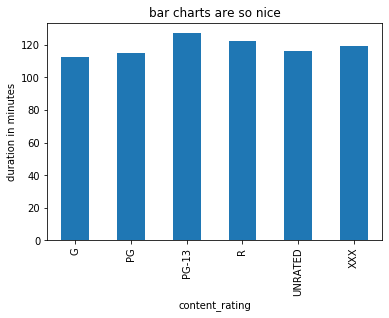

In [23]:
# use a visualization to detect whether there is a relationship between duration and star rating
results.plot.bar(title='bar charts are so nice')
plt.ylabel('duration in minutes')

In [1]:
# determine the top rated movie (by star rating) for each genre
movies.groupby('genre')['title', 'star_rating'].max()

NameError: name 'movies' is not defined

In [25]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
dupes=list(movies.loc[movies['title'].duplicated()]['title'])
movies[movies['title'].isin(dupes)].sort_values('title', ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,XXX,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."


In [26]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies
genre_counts=movies.groupby('genre')['genre'].count()
big_genre=list(genre_counts[genre_counts>10].index)
movies.loc[movies['genre'].isin(big_genre)].groupby('genre')['star_rating'].mean().sort_values(ascending=False)

genre
Mystery      7.975000
Adventure    7.933333
Crime        7.916935
Animation    7.914516
Drama        7.902518
Action       7.884559
Biography    7.862338
Comedy       7.822436
Horror       7.806897
Name: star_rating, dtype: float64

### Bonus level

In [27]:
# Figure out something "interesting" using the actors data!

In [28]:
# Let's display a list of movies that include Marlon Brando.
movies.loc[movies['actors_list'].str.contains('Marlon Brando')]

,star_rating,title,content_rating,genre,duration,actors_list
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
51,8.5,Apocalypse Now,R,Drama,153,"[u'Martin Sheen', u'Marlon Brando', u'Robert D..."
122,8.3,On the Waterfront,UNRATED,Crime,108,"[u'Marlon Brando', u'Karl Malden', u'Lee J. Co..."
284,8.1,A Streetcar Named Desire,PG,Drama,122,"[u'Vivien Leigh', u'Marlon Brando', u'Kim Hunt..."


In [29]:
# How many movies is Brando in?
len(movies.loc[movies['actors_list'].str.contains('Marlon Brando')])

4

In [30]:
# Let's explore a little further.
print(movies.iloc[0]['actors_list'])
# That 'u' is part of the external representation of the string, 
# meaning it's a Unicode string as opposed to a byte string. 

# Let's take a look at the first row of the dataframe, and break up that string of actors into its parts.
line = movies.iloc[0]['actors_list']
import re
line = re.sub("u'", "'", line)
line = re.sub("'", "", line)
line = re.sub('\[', "", line)
line = re.sub("\]", "", line)
actors_list=line.split(', ')
print(actors_list)
print(len(actors_list))
print(actors_list[0])

[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']
['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']
3
Tim Robbins


In [31]:
# Now let's write a function that displays all the actors in a clean list.
import re
def actors_cleanlist(row):
    line = row['actors_list']   
    line = re.sub("u'", "'", line)
    line = re.sub("'", "", line)
    line = re.sub('\[', "", line)
    line = re.sub("\]", "", line)
    actors_list=line.split(', ')
    return(actors_list)
actors_cleanlist(movies.iloc[0])

['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']

In [32]:
# Let's create a new column with that list.
movies['cleanlist']=movies.apply(actors_cleanlist, axis=1)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,cleanlist
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...","[Tim Robbins, Morgan Freeman, Bob Gunton]"
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']","[Marlon Brando, Al Pacino, James Caan]"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...","[Al Pacino, Robert De Niro, Robert Duvall]"
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...","[Christian Bale, Heath Ledger, Aaron Eckhart]"
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....","[John Travolta, Uma Thurman, Samuel L. Jackson]"


In [33]:
# Okay, let's create columns for actors 1, 2, and 3
movies['actor_0']=movies['cleanlist'].apply(lambda row: row[0])
movies['actor_1']=movies['cleanlist'].apply(lambda row: row[1])
movies['actor_2']=movies['cleanlist'].apply(lambda row: row[2])
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,cleanlist,actor_0,actor_1,actor_2
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...","[Tim Robbins, Morgan Freeman, Bob Gunton]",Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']","[Marlon Brando, Al Pacino, James Caan]",Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...","[Al Pacino, Robert De Niro, Robert Duvall]",Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...","[Christian Bale, Heath Ledger, Aaron Eckhart]",Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....","[John Travolta, Uma Thurman, Samuel L. Jackson]",John Travolta,Uma Thurman,Samuel L. Jackson


In [34]:
# Okay, who's the most frequent lead actor?
movies['actor_0'].value_counts().head()

Robert De Niro    13
Tom Hanks         12
Clint Eastwood    11
Al Pacino         10
Johnny Depp       10
Name: actor_0, dtype: int64

In [35]:
# Who are the most frequent supporting actors?
print(movies['actor_1'].value_counts().head())
print('\n')
print(movies['actor_2'].value_counts().head())

Emma Watson      7
Kate Winslet     6
Matt Damon       6
Geoffrey Rush    5
Julie Delpy      4
Name: actor_1, dtype: int64


Rupert Grint          6
Scarlett Johansson    5
Carrie Fisher         4
Julianne Moore        4
Ed Harris             4
Name: actor_2, dtype: int64
